## Finding Heavy Traffic Indicators on I-94


In this project, we're going to analyze a dataset about the westbound traffic on the I-94 [Interstate highway](https://en.wikipedia.org/wiki/Interstate_94)



Goal: determine a few indicators of heavy traffic on I-94 dataset. 

#### Lets first import the libraries we will be using

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### The I-94 Traffic Dataset

In [99]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv") #read the data into a dataframe

Examine the first and the last five rows.

In [100]:
traffic.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [101]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [102]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We have 3 datatypes distributed across our features. Four of the nine features have non-numeric dtype and the rest have numeric type 

In [103]:
traffic.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
traffic_volume             0
dtype: int64

we have no null values in our dataset! Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

In [175]:
print(traffic.dtypes)
traffic.dtypes.value_counts()

holiday                        object
temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object


object            3
float64           3
int64             2
datetime64[ns]    1
Name: count, dtype: int64

In [105]:
traffic.shape

(48204, 9)

The dataset has 48,204 rows and 9 features(columns). There are 3 non-numerical columns, 5 numerical ones and one datetime column.

###  Analyzing Traffic Volume


The [dataset documentation](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic (cars moving from east to west).



we're going to plot a histogram to visualize the distribution of the traffic_volume column.



__As a side note__: When we use Matplotlib inside jupyter, we also need to add the **%%matplotlib inline** magic command - this command enables jupyter to generate the graphs

In [106]:
%matplotlib inline

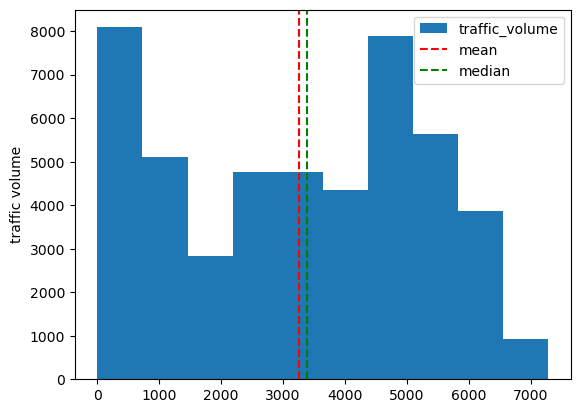

In [107]:
traffic['traffic_volume'].plot.hist()
plt.axvline(x=traffic['traffic_volume'].mean(),color='red', label='mean',linestyle='dashed')
plt.axvline(x=traffic['traffic_volume'].median(),color='green', label='median',linestyle='dashed')
plt.ylabel('traffic volume')
plt.legend()
plt.show()

In [108]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.



### Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

    * Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
    * Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

Lets transform the **date_time** column to **datetime** by using the function **pd.to_datetime()**

In [109]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [110]:
print(traffic['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


Note the time is in 24-hour clock format

In [111]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(day.shape)

night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(night.shape)


(23877, 9)
(24327, 9)


Now that we've isolated day and night, we're going to look at the histograms of traffic volume side-by-side by using a grid chart.



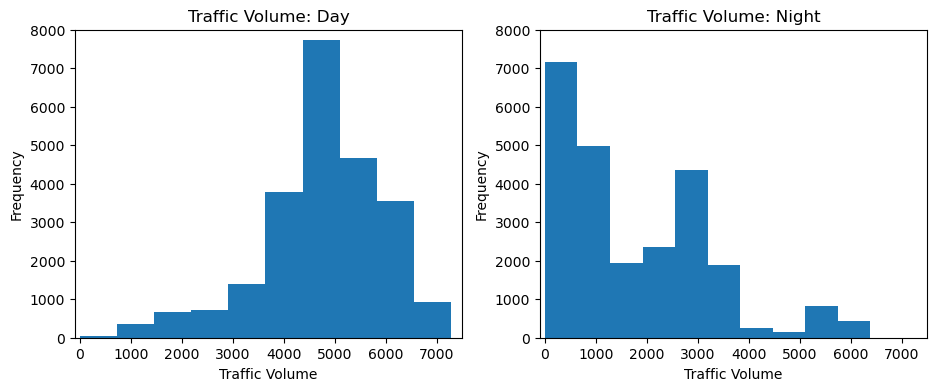

In [112]:
plt.figure(figsize=(11,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()


In [113]:
day['traffic_volume'].describe()


count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [114]:
night['traffic_volume'].describe()


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).



The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.



Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.



### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

    - Month
    - Day of the week
    - Time of day

### 1. Month

Lets start by visualizing the month

<Figure size 800x400 with 0 Axes>

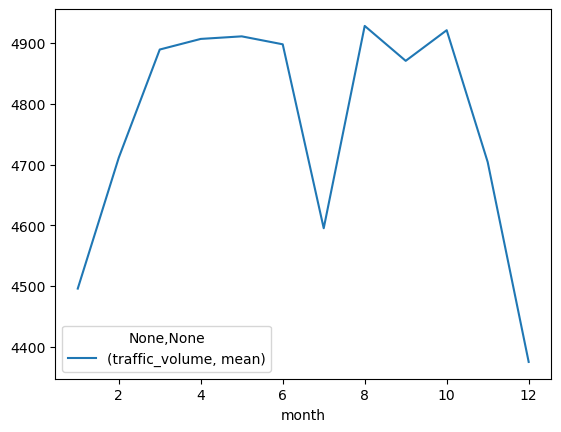

In [115]:
plt.figure(figsize=(8,4))
day['month'] = day['date_time'].dt.month
day.groupby('month').agg({'traffic_volume':['mean']}).plot()
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?





To answer the last question, let's see how the traffic volume changed each year in July.

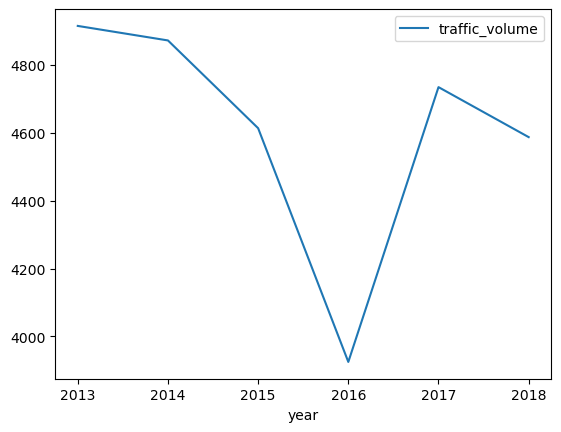

In [116]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').agg({'traffic_volume':'mean'}).plot()
plt.show()


Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.




As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.


### 2. Day of the week

We'll use the following code to get the traffic volume of the day

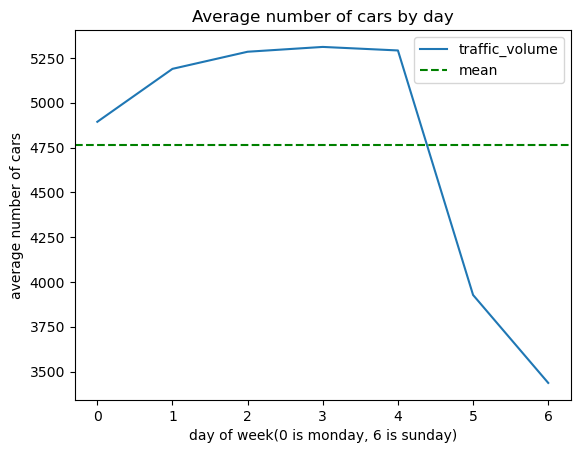

In [117]:
day['dayofweek'] = day['date_time'].dt.dayofweek
dayplot = day.groupby('dayofweek').agg({'traffic_volume':'mean'})
dayplot.plot()
plt.axhline(dayplot['traffic_volume'].mean(), color='green', linestyle='--', label='mean')
plt.title('Average number of cars by day')
plt.ylabel('average number of cars')
plt.xlabel('day of week(0 is monday, 6 is sunday)')
plt.legend()
plt.show()

Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see over 5,000  cars on average during business days. Traffic is lighter on weekends, with values below 4,000 cars.



### 3. Hour of the day

While generating the a line plot for the hour of the day, we'll have to separate business days and the weekend. Remember weekends had low traffic flow hence it will drag down our values.

In [118]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 is Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 is Saturday


In [119]:
by_hour_business = bussiness_days.groupby('hour').agg({'traffic_volume':'mean'})
by_hour_weekend = weekend.groupby('hour').agg({'traffic_volume':'mean'})


In the above cell, we group the business days and weekend by  hour. We proceed to aggregate their traffic volume by mean.


Let's draw line plots for business days and weekend side by side

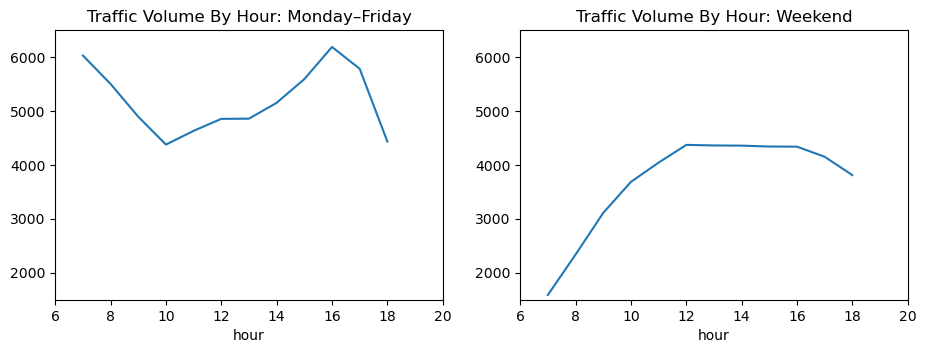

In [120]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')
by_hour_business['traffic_volume'].plot.line()

plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume By Hour: Weekend')
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.



To summarize, we found a few time-related indicators of heavy traffic:

    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to weekends.
    - On business days, the rush hours are around 7 and 16.


###   Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.



In [121]:
day.corr()['traffic_volume']

ValueError: could not convert string to float: 'Clouds'

**temp**  has the strongest correlation to **traffic_volume**.The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

Let's generate a scatter plot to visualize the correlation between temp and traffic_volume.



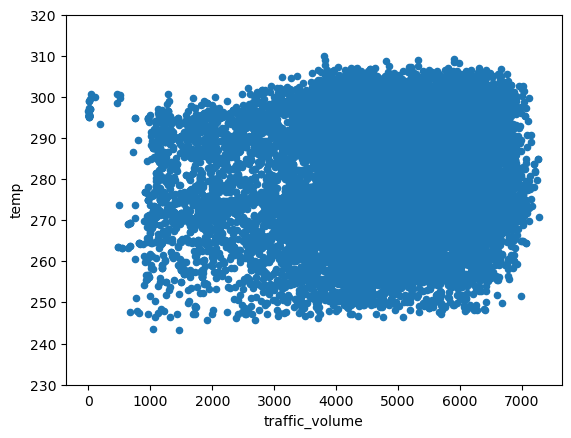

In [122]:
day.plot(kind='scatter',x='traffic_volume', y='temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()


We can conclude that temperature doesn't look like a solid indicator of heavy traffic

###   Weather Types

To start, we're going to group the data by weather_main and look at the traffic_volume averages.



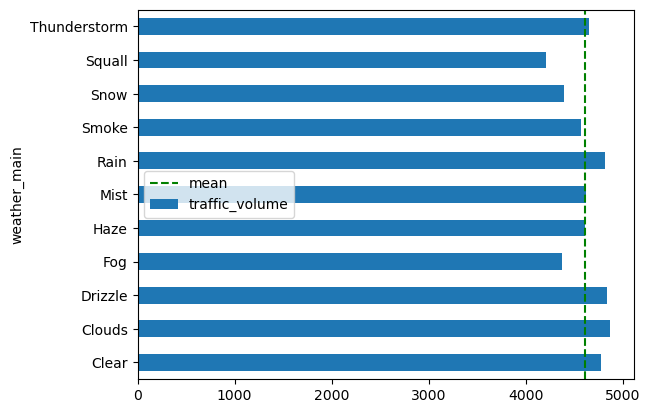

In [123]:
by_weather_main = day.groupby('weather_main').agg({'traffic_volume':'mean'})
by_weather_main['traffic_volume'].plot.barh()
plt.axvline(by_weather_main['traffic_volume'].mean(), color='green',linestyle='--',label='mean')
plt.legend()
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.



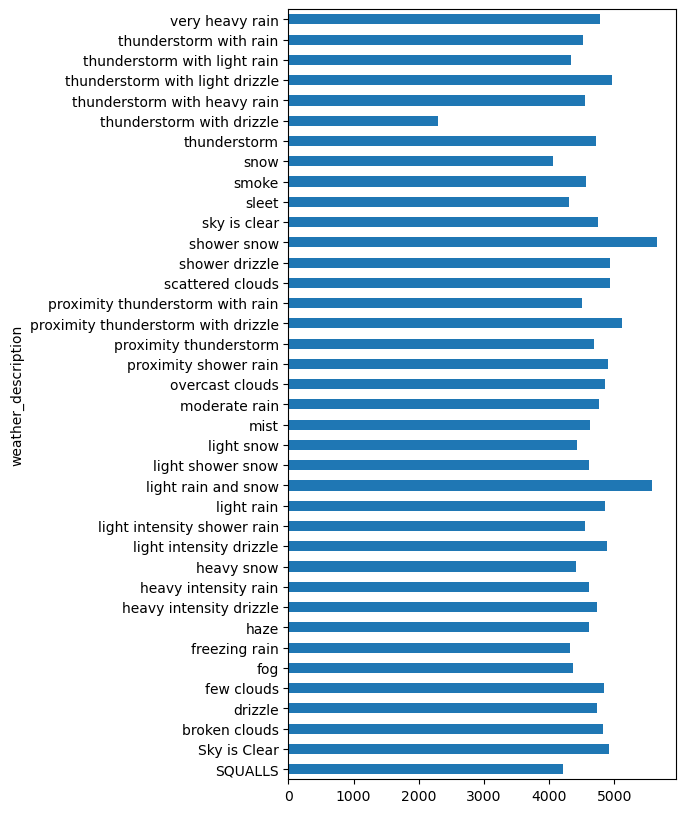

In [124]:
by_weather_description = day.groupby('weather_description').agg({'traffic_volume':'mean'})
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.



## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

#### Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7 and 16.
#### Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle

### Holidays

Holidays are likely influencers of traffic. In our next step, we're going to take a look at this.

Let's first replace the __NaN__ values in holiday column to __regular days__

In [161]:
traffic['holiday'].fillna('Regular Days',inplace=True)


Text(0.5, 1.0, 'traffic volume by holiday')

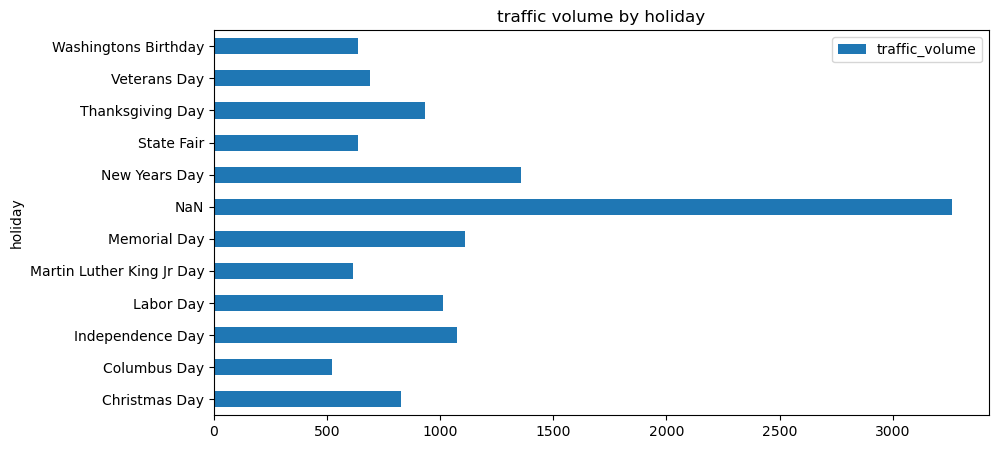

In [162]:
by_holiday = traffic.groupby('holiday').agg({'traffic_volume':'mean'})
by_holiday.plot.barh(figsize=(10,5))
plt.title('traffic volume by holiday')



Regular days have the highest traffic flow on average than the holidays.This means that holidays do not contribute heavily to heavy traffic. On our next research, we can investigate the holiday with the highest traffic flow on average, while excluding the regular days.

In [171]:
holiday_df = traffic.copy()
holiday_df['holiday'] = traffic['holiday'].replace('Regular Days',np.nan)

In [172]:
holiday_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


<AxesSubplot:ylabel='holiday'>

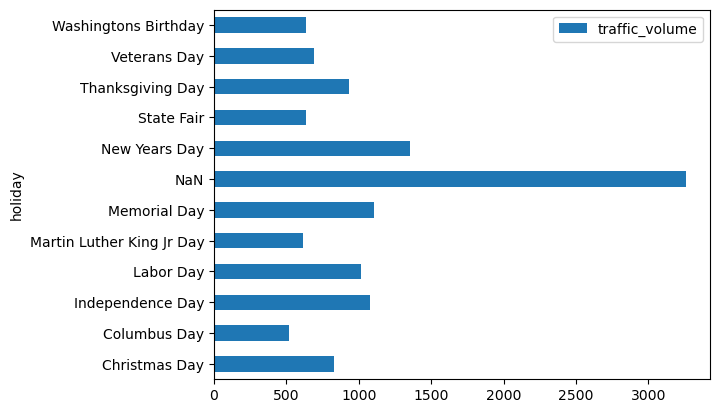

In [174]:
holiday_n = holiday_df.groupby(by='holiday',dropna=True).agg({"traffic_volume":'mean'})
holiday_n.plot.barh()